In [1]:
import pandas as pd
#data
dataset = pd.read_csv('C:/Users/nezim/PycharmProjects/percentile_calculator/percentile_results/data_set_percentiles_3modific.csv', engine='python')

In [2]:
#check the shape of data
dataset.shape

(215, 9)

In [3]:
dataset.head(13)

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th
0,OM,0.0000,0.0000,0.7676,0.000,14.1895,22.3215,0.0000,0.0000
1,PA,162.1620,125.0598,165.0538,0.000,40.2492,64.0953,0.0000,0.0000
2,PA6,3.4433,2.8920,5.0061,0.000,0.0000,0.0000,0.0000,0.0000
3,PETmono,4.2491,3.2417,0.0000,0.000,47.1720,75.1594,0.0000,0.0000
4,PETp,0.0000,0.0000,0.0000,0.293,61.6705,98.3685,0.0000,0.0000
5,PLA,142.9452,110.2697,112.9331,0.000,34.7932,55.3701,0.0000,0.0000
6,PP,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,138.5009,21.2797
7,PS,248.2050,191.4780,251.2935,0.000,0.0000,0.0000,65.6080,9.9274
8,PSf,0.0000,0.0000,0.0000,0.000,93.5659,149.3881,0.0000,0.0000
9,PVC,34.5560,26.8590,63.3302,0.000,0.0000,0.0000,0.0000,0.0000


In [4]:
data = dataset.sample(frac=0.80, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (172, 9)
Unseen Data For Predictions: (43, 9)


In [5]:
#setting up the environment in Pycaret
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'MPs', session_id=123) 

,Description,Value
0,session_id,123
1,Target,MPs
2,Target Type,Multiclass
3,Label Encoded,"OM: 0, PA: 1, PA6: 2, PE: 3, PETmono: 4, PETp: 5, PLA: 6, PP: 7, PS: 8, PSf: 9, PVC: 10"
4,Original Data,"(172, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
#comparation of models to identify best model
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9917,0.0000,0.9900,0.9875,0.9889,0.9906,0.9913,0.1490
dt,Decision Tree Classifier,0.9833,0.0000,0.9800,0.9750,0.9778,0.9811,0.9825,0.0100
rf,Random Forest Classifier,0.9833,0.0000,0.9800,0.9750,0.9778,0.9811,0.9825,0.1770
lr,Logistic Regression,0.9667,0.0000,0.9600,0.9500,0.9556,0.9621,0.9650,0.7200
lightgbm,Light Gradient Boosting Machine,0.9500,0.0000,0.9567,0.9361,0.9381,0.9439,0.9492,0.0770
nb,Naive Bayes,0.9333,0.0000,0.9222,0.9083,0.9139,0.9237,0.9294,0.0100
gbc,Gradient Boosting Classifier,0.9083,0.0000,0.8911,0.8667,0.8801,0.8944,0.9013,0.4960
lda,Linear Discriminant Analysis,0.9083,0.0000,0.8911,0.8833,0.8861,0.8957,0.9029,0.0110
knn,K Neighbors Classifier,0.9000,0.0000,0.8711,0.8708,0.8762,0.8861,0.8943,0.0140
ridge,Ridge Classifier,0.6417,0.0000,0.5585,0.5018,0.5490,0.5883,0.6140,0.0130


In [7]:
#based on previuos comparation we selected 3 out of 14
#Model 1 extra tree classifier
rfc = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.0000,0.9000,0.8750,0.8889,0.9062,0.9134
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9167,0.0000,0.9000,0.8750,0.8889,0.9048,0.9120
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [21]:
#trained model object is stored in the variable 'dt'. 


In [8]:
#model 2 Random forest classifier
etc = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.0000,0.9000,0.8750,0.8889,0.9062,0.9134
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [9]:
#model 3 Exra tree classifier
dtc = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.0000,0.9000,0.8750,0.8889,0.9062,0.9134
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9167,0.0000,0.9000,0.8750,0.8889,0.9048,0.9120
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [12]:
#tester de modelos
import numpy as np
#tuned_dt = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})
tuned_dt = tune_model(rfc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.0000,0.9000,0.8750,0.8889,0.9062,0.9134
1,0.9167,0.0000,0.8182,0.9167,0.9167,0.9070,0.9141
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9167,0.0000,0.9000,0.8750,0.8889,0.9048,0.9120
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9167,0.0000,0.9444,0.9583,0.9167,0.9040,0.9113


In [13]:
tuned_1 = tune_model(etc)
tuned_1

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.0000,0.9000,0.8750,0.8889,0.9062,0.9134
1,0.9167,0.0000,0.9000,0.8750,0.8889,0.9062,0.9134
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9167,0.0000,0.8182,0.9167,0.9167,0.9055,0.9127
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9167,0.0000,0.9444,0.9583,0.9167,0.9040,0.9113


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [14]:
#tuned model object is stored in the variable 'tuned_rtc'. 
print(tuned_dt)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


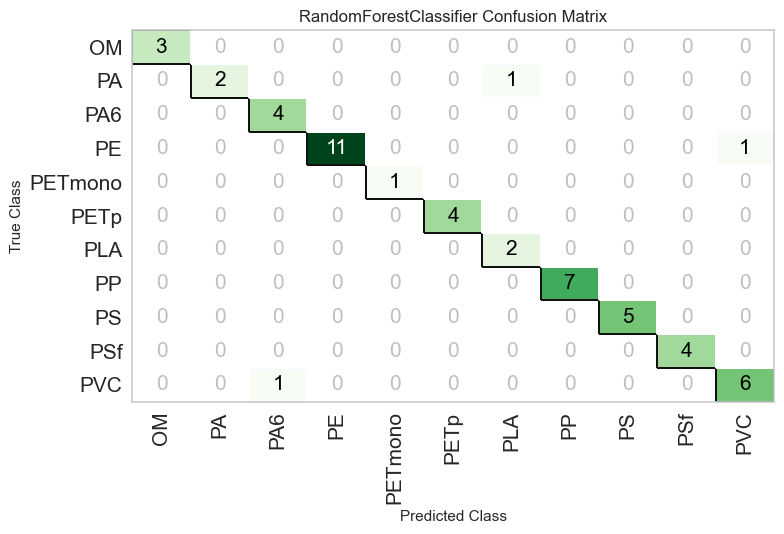

In [15]:
plot_model(tuned_dt, plot = 'confusion_matrix')

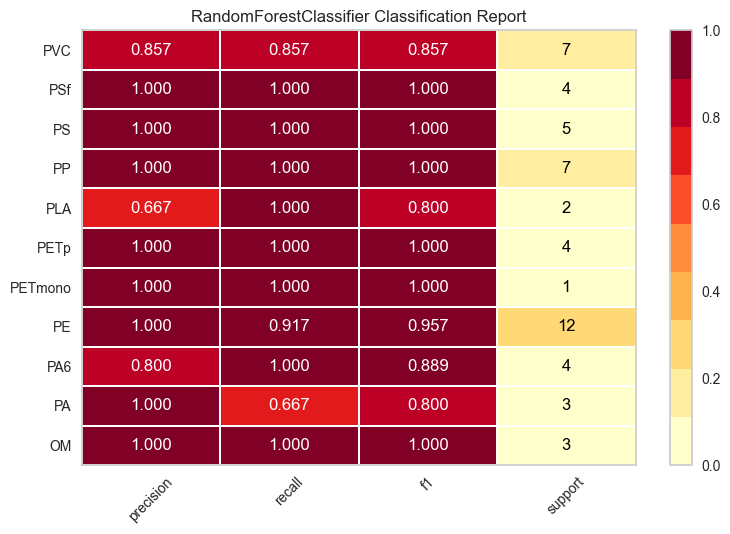

In [16]:
plot_model(tuned_dt, plot = 'class_report')

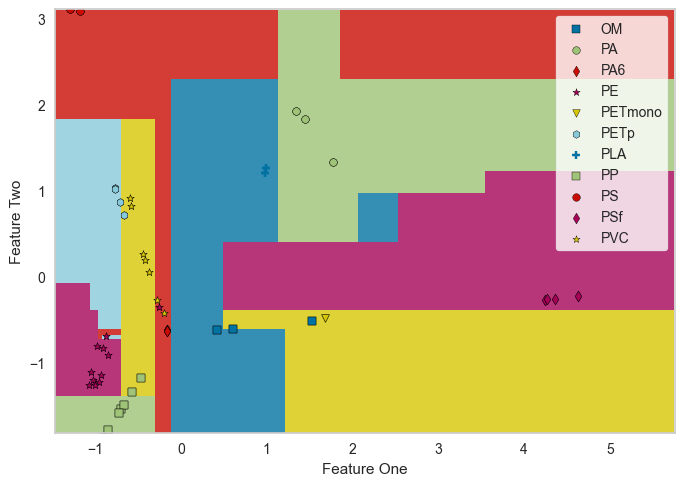

In [17]:
plot_model(tuned_dt, plot='boundary')

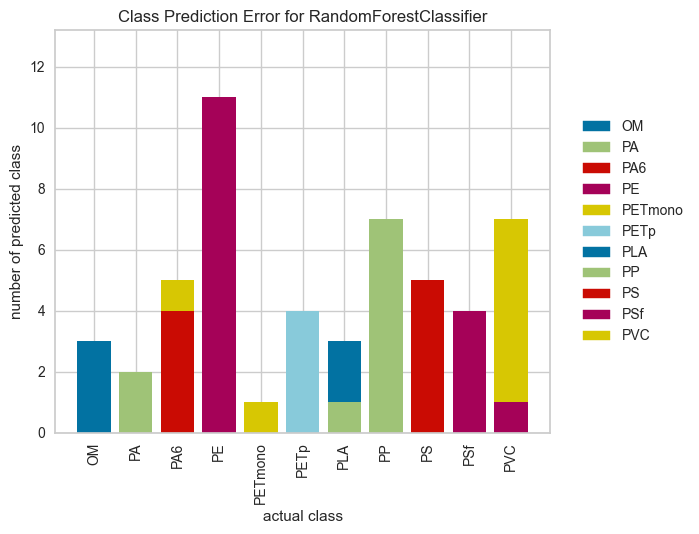

In [18]:
plot_model(tuned_dt, plot = 'error')

In [44]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [20]:
#prediction/tests
predict_model(tuned_dt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9423,0.9993,0.9491,0.9526,0.9430,0.9343,0.9351


In [21]:
#final model for deployment
final_rfc2 = finalize_model(tuned_dt)

In [22]:
#Final K Nearest Neighbour parameters for deployment
print(final_rfc2)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [23]:
#predict unseen data
unseen_predictions = predict_model(final_rfc2, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0000,0,0,0,0,0,0


,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th,Label,Score
0,PLA,142.9452,110.2697,112.9331,0.0,34.7932,55.3701,0.0000,0.0000,PLA,0.7186
1,PA,165.5161,127.6352,175.4874,0.0,39.1931,62.4213,0.0000,0.0000,PA,0.7958
2,PLA,90.7318,70.1037,103.4964,0.0,27.6290,43.9013,0.0000,0.0000,PLA,0.8121
3,PE,20.5610,16.1410,11.2123,0.0,0.0000,0.0000,188.6333,29.0049,PE,0.5559
4,PA,147.2278,113.5576,149.4855,0.0,43.7979,69.7651,0.0000,0.0000,PA,0.8621


In [24]:
#saving the modelrfc
save_model(final_rfc2,'Final rfc2 Model 27oct2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='MPs',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=6,
                                         max_features

In [25]:
#loading saved model
saved_final_rfc2 = load_model('Final rfc2 Model 27oct2022')


Transformation Pipeline and Model Successfully Loaded


In [26]:
new_prediction = predict_model(saved_final_rfc2, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0000,0,0,0,0,0,0


In [27]:
new_prediction.head()

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th,Label,Score
0,PLA,142.9452,110.2697,112.9331,0.0,34.7932,55.3701,0.0000,0.0000,PLA,0.7186
1,PA,165.5161,127.6352,175.4874,0.0,39.1931,62.4213,0.0000,0.0000,PA,0.7958
2,PLA,90.7318,70.1037,103.4964,0.0,27.6290,43.9013,0.0000,0.0000,PLA,0.8121
3,PE,20.5610,16.1410,11.2123,0.0,0.0000,0.0000,188.6333,29.0049,PE,0.5559
4,PA,147.2278,113.5576,149.4855,0.0,43.7979,69.7651,0.0000,0.0000,PA,0.8621


In [28]:
data2 = pd.read_csv('C:/Users/nezim/PycharmProjects/percentile_calculator/percentile_results/data2.csv', engine='python')

In [29]:
data2

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th
0,PP,0.000,0.000,0.000,0,0.000,0.000,157.483,24.254
1,PP,0.000,0.000,0.000,0,0.000,0.000,120.903,18.559
2,PE102,142.338,109.799,147.041,0,35.069,55.819,23.741,3.400
3,PLA,28.535,22.293,40.781,0,50.217,80.045,15.706,2.004
4,PP,0.000,0.000,0.000,0,6.391,10.047,100.813,15.423
5,PP,0.000,0.000,0.000,0,6.447,10.118,101.315,15.503
6,PS,248.014,191.366,249.374,0,3.000,4.000,54.586,8.204
7,PS,236.927,182.718,252.486,0,3.000,4.000,34.835,5.123
8,PVC,26.652,15.291,114.248,0,0.000,0.000,0.000,0.000
9,PVC,22.043,17.434,105.909,0,0.000,0.000,0.000,0.000


In [30]:
new_prediction = predict_model(saved_final_rfc2, data=data2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0000,0,0,0,0,0,0


In [31]:
new_prediction.head(10)

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th,Label,Score
0,PP,0.000,0.000,0.000,0,0.000,0.000,157.483,24.254,PP,0.9855
1,PP,0.000,0.000,0.000,0,0.000,0.000,120.903,18.559,PP,0.9826
2,PE102,142.338,109.799,147.041,0,35.069,55.819,23.741,3.400,PLA,0.5064
3,PLA,28.535,22.293,40.781,0,50.217,80.045,15.706,2.004,PA,0.2857
4,PP,0.000,0.000,0.000,0,6.391,10.047,100.813,15.423,PP,0.4436
5,PP,0.000,0.000,0.000,0,6.447,10.118,101.315,15.503,PP,0.4436
6,PS,248.014,191.366,249.374,0,3.000,4.000,54.586,8.204,PS,0.8495
7,PS,236.927,182.718,252.486,0,3.000,4.000,34.835,5.123,PS,0.8526
8,PVC,26.652,15.291,114.248,0,0.000,0.000,0.000,0.000,PVC,0.9264
9,PVC,22.043,17.434,105.909,0,0.000,0.000,0.000,0.000,PVC,0.9264


In [32]:
data_natural_gb = pd.read_csv('C:/Users/nezim/PycharmProjects/percentile_calculator/percentile_results/natural_samples_gb.csv', engine='python')

In [33]:
data_natural_gb.head(26)

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th
0,1_gb0595_r2,7.170,5.795,11.594,0,37.794,60.110,0.000,0.000
1,2_gb0595_r2,3.275,2.733,5.536,0,69.463,110.822,7.829,0.000
2,3_gb0595_r2,52.342,40.559,85.833,0,5.689,8.473,15.348,2.000
3,4_gb0595_r2,0.000,0.000,0.000,0,86.018,137.310,0.000,0.000
4,1_gb0595_r1,0.000,0.000,3.469,0,159.000,254.000,0.000,0.000
5,2_gb0595_r1,0.000,0.000,0.000,0,66.508,106.113,0.000,0.000
6,3_gb0595_r1,4.489,3.797,7.627,0,91.850,146.643,0.000,0.000
7,4_gb0595_r1,7.822,6.332,13.861,0,138.474,221.211,0.000,0.000
8,1_gb070_r2,2.894,2.485,10.814,0,0.000,0.000,0.000,0.000
9,2_gb070_r2,0.000,0.000,10.243,0,18.258,28.862,0.000,0.000


In [34]:
new_prediction_ns = predict_model(saved_final_rfc2, data=data_natural_gb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0000,0,0,0,0,0,0


In [35]:
new_prediction_ns.head()

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th,Label,Score
0,1_gb0595_r2,7.170,5.795,11.594,0,37.794,60.110,0.000,0.0,PETmono,0.3816
1,2_gb0595_r2,3.275,2.733,5.536,0,69.463,110.822,7.829,0.0,PSf,0.3167
2,3_gb0595_r2,52.342,40.559,85.833,0,5.689,8.473,15.348,2.0,OM,0.3171
3,4_gb0595_r2,0.000,0.000,0.000,0,86.018,137.310,0.000,0.0,PSf,0.9217
4,1_gb0595_r1,0.000,0.000,3.469,0,159.000,254.000,0.000,0.0,PSf,0.5483


In [36]:
new_prediction_ns

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th,Label,Score
0,1_gb0595_r2,7.170,5.795,11.594,0,37.794,60.110,0.000,0.000,PETmono,0.3816
1,2_gb0595_r2,3.275,2.733,5.536,0,69.463,110.822,7.829,0.000,PSf,0.3167
2,3_gb0595_r2,52.342,40.559,85.833,0,5.689,8.473,15.348,2.000,OM,0.3171
3,4_gb0595_r2,0.000,0.000,0.000,0,86.018,137.310,0.000,0.000,PSf,0.9217
4,1_gb0595_r1,0.000,0.000,3.469,0,159.000,254.000,0.000,0.000,PSf,0.5483
5,2_gb0595_r1,0.000,0.000,0.000,0,66.508,106.113,0.000,0.000,PSf,0.6410
6,3_gb0595_r1,4.489,3.797,7.627,0,91.850,146.643,0.000,0.000,PSf,0.3915
7,4_gb0595_r1,7.822,6.332,13.861,0,138.474,221.211,0.000,0.000,PSf,0.3915
8,1_gb070_r2,2.894,2.485,10.814,0,0.000,0.000,0.000,0.000,PA6,0.9513
9,2_gb070_r2,0.000,0.000,10.243,0,18.258,28.862,0.000,0.000,OM,0.6478


In [37]:
dframe = pd.DataFrame(new_prediction_ns)

In [38]:
dframe.to_csv('natural_samples_prediction.csv')

In [40]:
unseen_predictions
unseen_predictions.to_csv('prediction_20data.csv')